In [1]:
## Mapping the buildt-up area using the Indices For Landsat 8 OLI

In [2]:
from glob import glob

import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep

import rasterio as rio
from pyrsgis import raster

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

import plotly.graph_objects as go


%matplotlib inline

np.seterr(divide= 'ignore', over= 'warn', under= 'ignore', invalid='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [3]:
landsat_mx_bands = "l8_Thimphu_Jan_2021.tif"

In [4]:
landsat_mx_bands

'l8_Thimphu_Jan_2021.tif'

In [5]:
ds1, landsat_image_array = raster.read(landsat_mx_bands,bands='all')

In [25]:
landsat_image_array

array([[[ 7303,  7245,  7180, ...,  7285,  7234,  7275],
        [ 7319,  7273,  7341, ...,  7309,  7339,  7337],
        [ 7308,  7330,  7423, ...,  7380,  7319,  7368],
        ...,
        [ 8812,  9164,  9001, ...,  7231,  7199,  7148],
        [ 9361,  9289,  9373, ...,  7236,  7131,  7011],
        [ 9732,  9771,  9959, ...,  7090,  7119,  7062]],

       [[ 7568,  7490,  7400, ...,  7460,  7356,  7395],
        [ 7534,  7472,  7536, ...,  7447,  7463,  7519],
        [ 7510,  7557,  7670, ...,  7560,  7492,  7528],
        ...,
        [ 9321,  9779,  9577, ...,  7434,  7396,  7321],
        [ 9911,  9931, 10166, ...,  7431,  7302,  7191],
        [10409, 10613, 10901, ...,  7245,  7256,  7208]],

       [[ 8175,  8005,  7883, ...,  7804,  7676,  7823],
        [ 8209,  8071,  8169, ...,  7945,  7981,  7922],
        [ 8044,  8191,  8252, ...,  8180,  8022,  8068],
        ...,
        [10188, 11166, 10825, ...,  7798,  7776,  7666],
        [11130, 11337, 12098, ...,  7756,  75

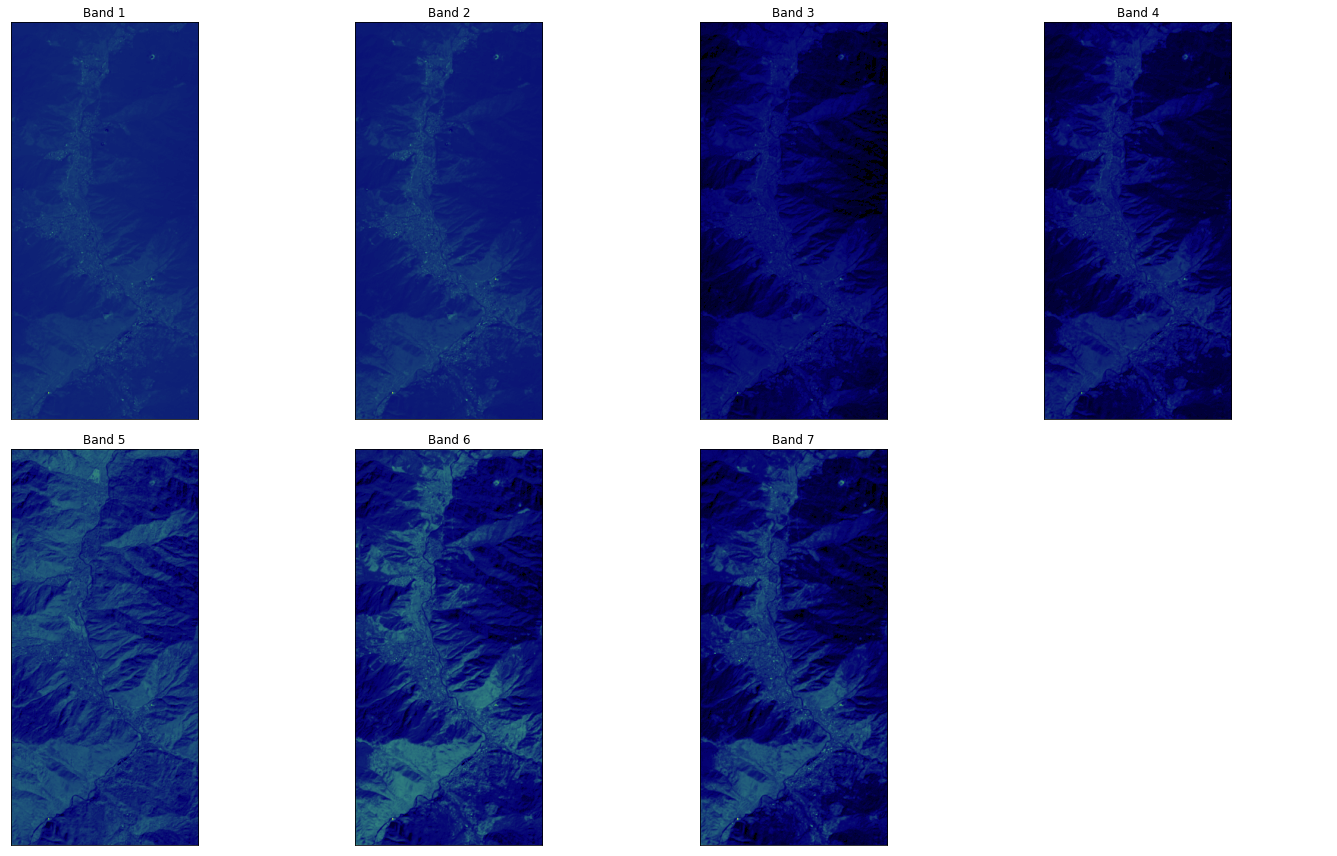

In [26]:
ep.plot_bands(landsat_image_array, cmap = 'gist_earth', figsize = (20, 12), cols =4,cbar = False)
plt.show()

In [8]:
# True Color Composite Mapping

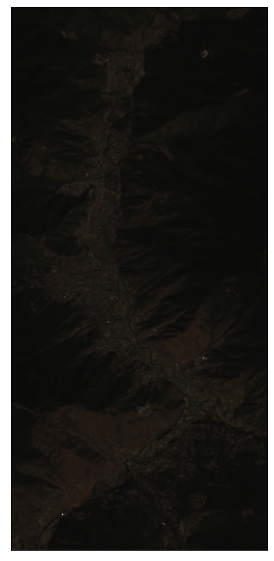

In [27]:
rgb = ep.plot_rgb(landsat_image_array,rgb=(3,2,1))
plt.show()

In [29]:
# NDVI -Normalized Difference Vegetation Index

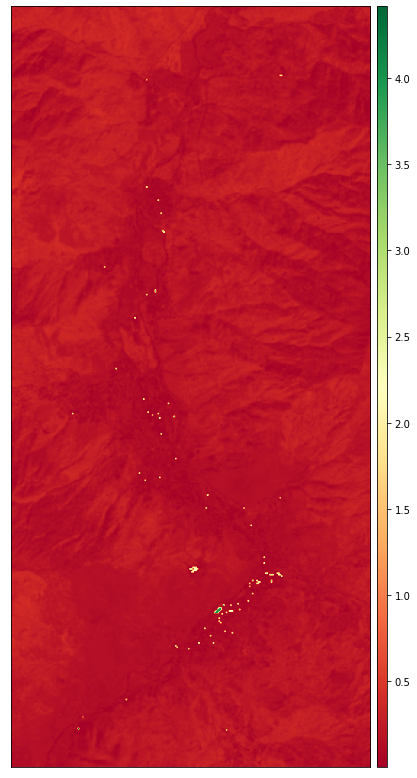

In [38]:
ndvi = es.normalized_diff(landsat_image_array[4],landsat_image_array[3])

ep.plot_bands(ndvi, cmap="RdYlGn", cols=1, figsize=(10, 14))

plt.show()

In [12]:
# NDBI - Normalized Difference Built-up Index

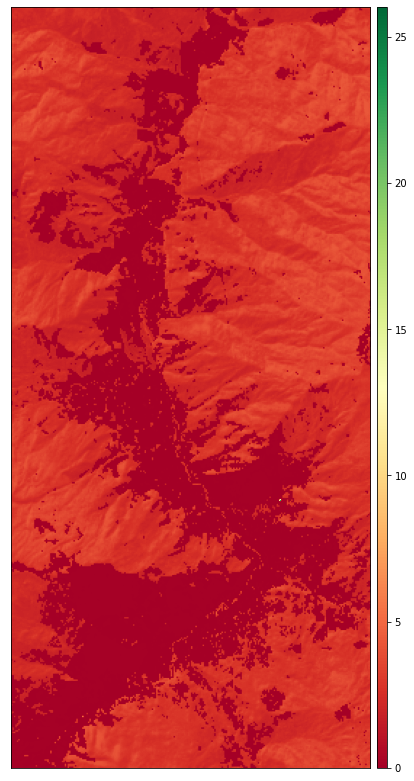

In [39]:
ndbi = es.normalized_diff(landsat_image_array[5],landsat_image_array[4])

ep.plot_bands(ndbi, cmap="RdYlGn", cols=1, figsize=(10, 14))

plt.show()

In [17]:
# Built-Up (BU)

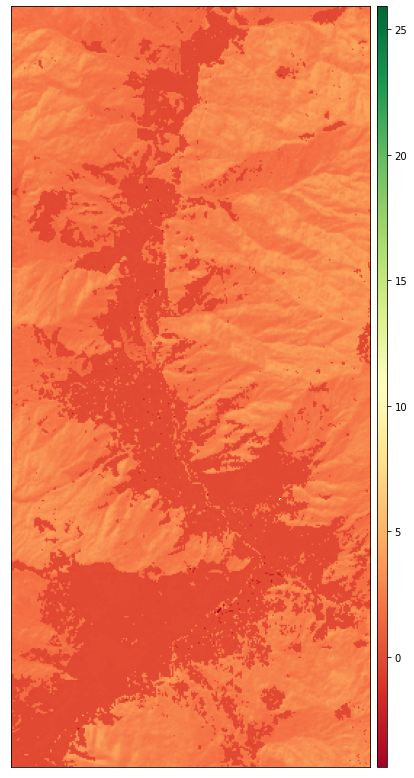

In [19]:
bu = ndbi - ndvi
ep.plot_bands(bu, cmap="RdYlGn", figsize=(10, 14))

plt.show()

In [56]:
bu_mask = bu > -1.6

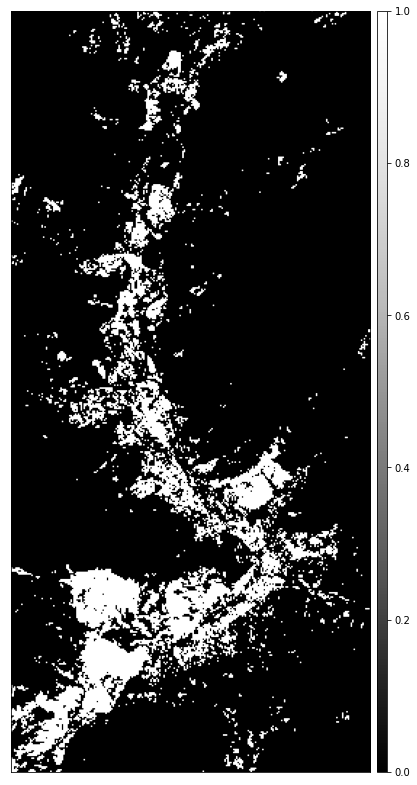

In [57]:
ep.plot_bands(bu_mask, figsize=(10, 14))

plt.show()

In [58]:
outFile = 'Thimphu_2012_Builtup_mask.tif'
raster.export(bu_mask, ds1, filename=outFile, dtype='float')

In [59]:
landsat_mx_bands_mask = "Thimphu_2012_Builtup_mask.tif"

In [60]:
landsat_mx_bands_mask

'Thimphu_2012_Builtup_mask.tif'

In [63]:
ds1, landsat_image_array_mask = raster.read(landsat_mx_bands_mask,bands=1)

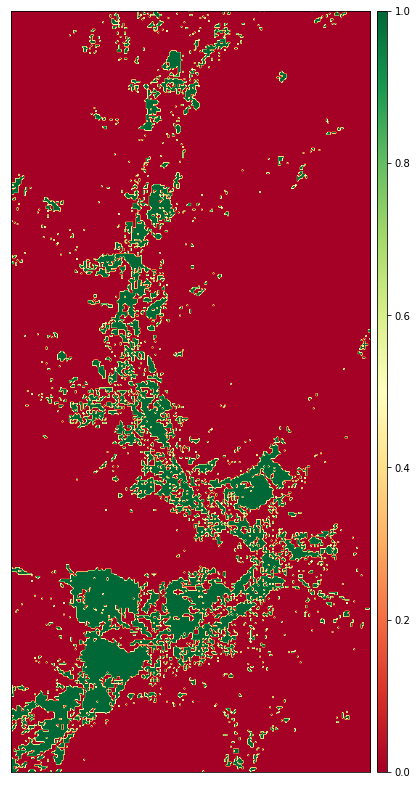

In [64]:
ep.plot_bands(landsat_image_array_mask, cmap="RdYlGn",figsize=(10, 14))

plt.show()